**Step 1: Inspect JSON Structure**

In [35]:
# Load JSON data
with open(json_path, 'r') as f:
    data = json.load(f)

# Print the structure of the first few items in the JSON file
print("First few items in the JSON data:")
for item in data[:5]:
    print(item)


First few items in the JSON data:
{'id': 302, 'annotations': [{'id': 309, 'completed_by': 1, 'result': [{'value': {'choices': ['not-good-to-harvest']}, 'id': 'aZ4HvMt6UL', 'from_name': 'label', 'to_name': 'image', 'type': 'choices', 'origin': 'manual'}], 'was_cancelled': False, 'ground_truth': False, 'created_at': '2025-05-13T17:03:36.560189Z', 'updated_at': '2025-05-13T17:03:36.560189Z', 'draft_created_at': '2025-05-13T16:55:44.249150Z', 'lead_time': 200.119, 'prediction': {}, 'result_count': 1, 'unique_id': 'be0ba895-fb73-4796-bc3d-cf6365b4da0a', 'import_id': None, 'last_action': None, 'bulk_created': False, 'task': 302, 'project': 6, 'updated_by': 1, 'parent_prediction': None, 'parent_annotation': None, 'last_created_by': None}], 'file_upload': 'd4a356d5-IMG_20240603_151019.jpg', 'drafts': [], 'predictions': [], 'data': {'image': '/data/upload/6/d4a356d5-IMG_20240603_151019.jpg'}, 'meta': {}, 'created_at': '2025-05-13T16:53:01.009094Z', 'updated_at': '2025-05-13T17:03:36.594425Z', '

**for Extracting Image Filenames and Labels:**

In [37]:
import json
import os

# Set the path to your JSON file and image folder
json_path = 'C:\\MurthyLab\\Project_classi\\classification.json'
image_folder = 'C:\\MurthyLab\\Project_classi\\Water melon'

# Load JSON data
with open(json_path, 'r') as f:
    data = json.load(f)

# Extract image names and labels
image_names = []
labels = []

for item in data:
    # Extract the image filename from 'file_upload' field
    image_filename = item['file_upload'].split('-')[-1]  # Remove any prefixes in the file_upload field
    image_names.append(image_filename)

    # Extract label from 'annotations' -> 'result' -> 'value' -> 'choices'
    label = item['annotations'][0]['result'][0]['value']['choices'][0]
    labels.append(label)

# Print the extracted image names and labels
print("Extracted images and labels:")
for image, label in zip(image_names, labels):
    print(f"{image}: {label}")

# Verify if the images exist in the folder
for image in image_names:
    image_path = os.path.join(image_folder, image)
    if not os.path.isfile(image_path):
        print(f"Warning: {image} not found in folder.")


Extracted images and labels:
IMG_20240603_151019.jpg: not-good-to-harvest
IMG_20240603_151140.jpg: good-to-harvest
IMG_20240603_151144.jpg: good-to-harvest
IMG_20240603_151148.jpg: good-to-harvest
IMG_20240603_151152.jpg: not-good-to-harvest
IMG_20240603_151202.jpg: good-to-harvest
IMG_20240603_151207.jpg: not-good-to-harvest
IMG_20240603_151213.jpg: good-to-harvest
IMG_20240603_151216.jpg: not-good-to-harvest
IMG_20240603_151221.jpg: good-to-harvest
IMG_20240603_151225.jpg: good-to-harvest
IMG_20240603_151228.jpg: not-good-to-harvest
IMG_20240603_151242.jpg: good-to-harvest
IMG_20240603_151244.jpg: good-to-harvest
IMG_20240603_151247.jpg: good-to-harvest
IMG_20240603_151254.jpg: good-to-harvest
IMG_20240603_151300.jpg: good-to-harvest
IMG_20240603_151305.jpg: good-to-harvest
IMG_20240603_151307.jpg: good-to-harvest
IMG_20240603_151315.jpg: good-to-harvest
IMG_20240603_151324.jpg: good-to-harvest
IMG_20240603_151331.jpg: good-to-harvest
IMG_20240603_151335.jpg: good-to-harvest
IMG_2024

**Code for Splitting Data:**

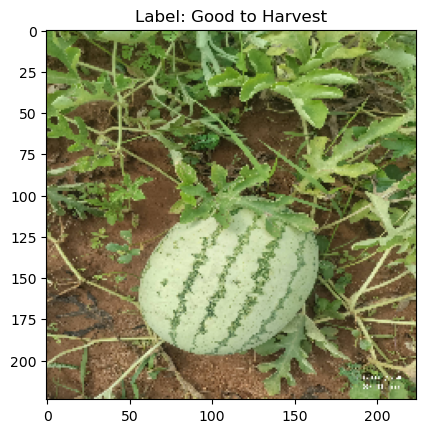

In [38]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Define the path to your image folder
image_folder = 'C:\\MurthyLab\\Project_classi\\Water melon'

# Load images and labels
image_paths = [os.path.join(image_folder, img_name) for img_name in image_names]
labels = [1 if label == 'good-to-harvest' else 0 for label in labels]  # 1 for 'good-to-harvest', 0 for 'not-good-to-harvest'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

# Function to load images
def load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize images to (224, 224)
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array

# Load a sample image to check
sample_image = load_image(X_train[0])

# Show the sample image
plt.imshow(sample_image[0])  # Remove the batch dimension for visualization
plt.title(f"Label: {'Good to Harvest' if y_train[0] == 1 else 'Not Good to Harvest'}")
plt.show()

# Now you can proceed with training a model using these images and labels


**1. Build a Simple CNN Model:**

In [39]:
from tensorflow.keras import layers, models

# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


C:\Users\narra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

**2. Prepare the Data for Training:**

In [40]:
# Load training and testing images
def load_images(image_paths):
    images = []
    for img_path in image_paths:
        img_array = load_image(img_path)  # Load image
        images.append(img_array)
    return np.vstack(images)

# Load train and test images
X_train_images = load_images(X_train)
X_test_images = load_images(X_test)

# Convert labels to numpy arrays
y_train_labels = np.array(y_train)
y_test_labels = np.array(y_test)


**3. Train the Model:**

In [45]:
# Train the model
history = model.fit(X_train_images, y_train_labels, epochs=200, batch_size=32, validation_data=(X_test_images, y_test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_images, y_test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 579ms/step - accuracy: 1.0000 - loss: 5.0165e-06 - val_accuracy: 0.6129 - val_loss: 4.3958
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 565ms/step - accuracy: 1.0000 - loss: 4.2794e-06 - val_accuracy: 0.6452 - val_loss: 4.4287
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 557ms/step - accuracy: 1.0000 - loss: 4.1008e-06 - val_accuracy: 0.6452 - val_loss: 4.4484
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step - accuracy: 1.0000 - loss: 3.4609e-06 - val_accuracy: 0.6452 - val_loss: 4.4405
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 558ms/step - accuracy: 1.0000 - loss: 4.1585e-06 - val_accuracy: 0.6452 - val_loss: 4.4525
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 567ms/step - accuracy: 1.0000 - loss: 3.7699e-06 - val_accuracy: 0.6452 - val_loss: 4.4751
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 570ms/step - accuracy: 1.0000 - loss: 3.8977e-06 - val_accuracy: 0.6452 - val_loss: 4.4860
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 576ms/step - accuracy: 1.0000 - loss: 3.448

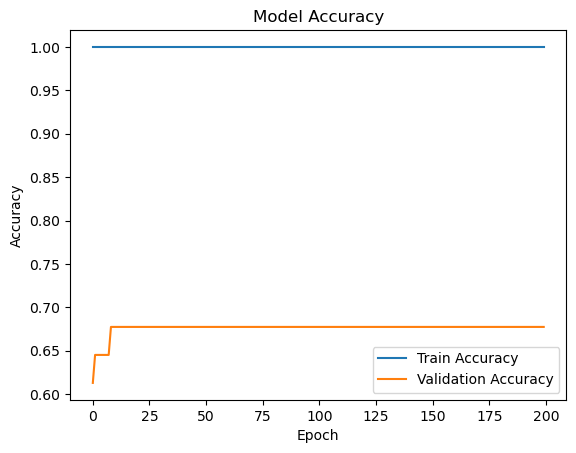

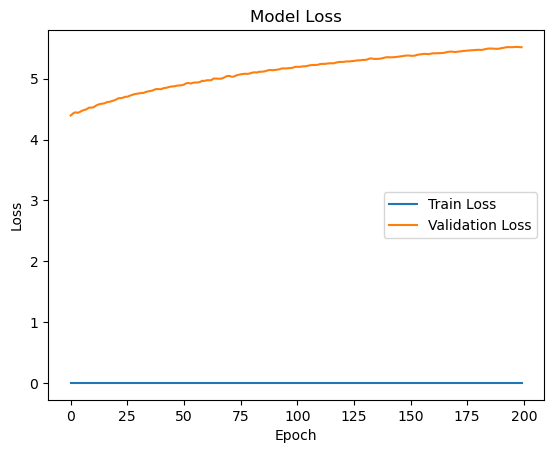

In [54]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**1. Add Data Augmentation**

In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train_images)


In [47]:
model.fit(datagen.flow(X_train_images, y_train_labels, batch_size=32),
          epochs=50,  # Reduce epochs
          validation_data=(X_test_images, y_test_labels))


C:\Users\narra\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 673ms/step - accuracy: 0.5601 - loss: 3.5310 - val_accuracy: 0.6129 - val_loss: 0.6903
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 659ms/step - accuracy: 0.5716 - loss: 0.7057 - val_accuracy: 0.3871 - val_loss: 0.7219
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 665ms/step - accuracy: 0.5736 - loss: 0.7479 - val_accuracy: 0.6129 - val_loss: 0.6791
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 674ms/step - accuracy: 0.4966 - loss: 0.6940 - val_accuracy: 0.3871 - val_loss: 0.6980
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 675ms/step - accuracy: 0.4266 - loss: 0.6957 - val_accuracy: 0.3871 - val_loss: 0.6935
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 673ms/step - accuracy: 0.4674 - loss: 0.6934 - val_accuracy: 0.6129 - val_loss: 0.6860
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 685ms/step - accuracy: 0.5020 - loss: 0.6941 - val_accuracy: 0.6129 - val_loss: 0.6928
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 690ms/step - accuracy: 0.5439 - loss: 0.6955 - val_accuracy: 0.6129 - val_loss:

**2. Add Dropout to Your CNN**

In [48]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # added

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  # added

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),  # added

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # added
    layers.Dense(1, activation='sigmoid')
])


**3.Use Early Stopping (Prevent overfitting)**

In [52]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define your model (example)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# ✅ Compile the model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ✅ Now you can fit the model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(
    datagen.flow(X_train_images, y_train_labels, batch_size=32),
    epochs=100,
    validation_data=(X_test_images, y_test_labels),
    callbacks=[early_stop]
)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4893 - loss: 6.6166 - val_accuracy: 0.6129 - val_loss: 3.0381
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4902 - loss: 5.3681 - val_accuracy: 0.3871 - val_loss: 1.6820
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4676 - loss: 1.7456 - val_accuracy: 0.3871 - val_loss: 0.7194
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5233 - loss: 0.7449 - val_accuracy: 0.6129 - val_loss: 0.6912
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4689 - loss: 0.6902 - val_accuracy: 0.6129 - val_loss: 0.6924
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5063 - loss: 0.6938 - val_accuracy: 0.6129 - val_loss: 0.6923
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5527 - loss: 0.6919 - val_accuracy: 0.6129 - val_loss: 0.6921
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5761 - loss: 0.6912 - val_accuracy: 0.6129 - val_loss: 0.6913
Epoch 9/

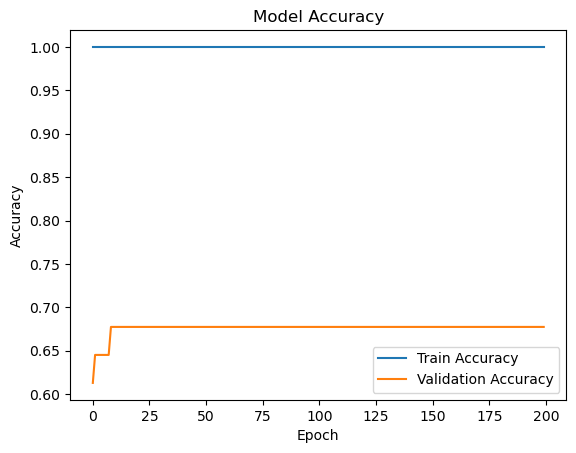

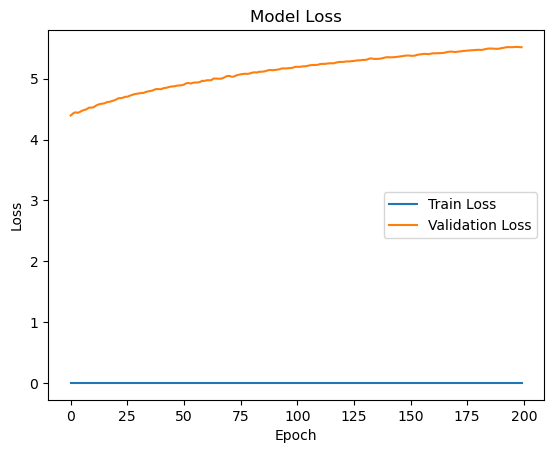

In [53]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [1]:
from sklearn.metrics import precision_score, recall_score

# Assuming you have the true labels and predicted labels
true_labels = [0, 1, 0, 1, 1, 0, 1, 1]  # Ground truth labels
predicted_labels = [0, 1, 1, 1, 0, 0, 1, 0]  # Model's predicted labels

# Calculate precision and recall
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.7500
Recall: 0.6000
